000 07 10 100 107 11 12 14 15 150 19 1933 1983 1989 20 200 2002 2013 2014 2015 2016 2017 2018 2019 2020 2021 21 22 23 24 25 264 265 266 267 268 269 270 271 272 273 275 277 278 285 286 287 288 289 290 291 292 293 294 296 297 298 299 30 300 301 302 303 304 305 306 307 308 309 310 311 313 314 315 316 317 318 319 32 320 321 322 323 324 325 326 327 328 329 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 346 347 348 349 350 351 352 353 354 355 358 359 36 360 361 362 363 364 365 366 367 368 369 370 371 373 374 375 376 377 378 379 380 381e 382 383 384 385 386 387 388 389 390 392 393 394 395 396 397 398 399 40 400 401 402 403 404 405 406 407 408 409 410 411 412 413 414 415 416 417 418 419 42 420 421 422 423 424 431 432 433 434 435 436 437 438 439 440 442 443 444 445 446 447 448 449 450 451 452 454 455 456 457 459 461 462 464 467 468 469 470 471 472 473 474 475 476 477 478 479 48 480 481 482 483 484 485 487 488 489 490 491 492 493 494 495 496 497 498 499 50 500 501 502 503 504 506 50

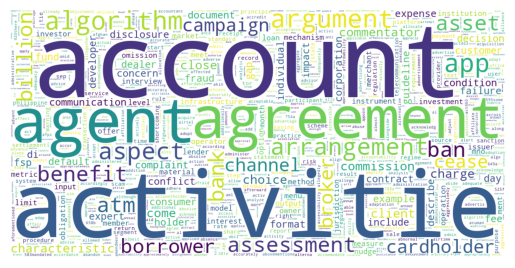

In [64]:
import encodings
import nltk
import os
import openpyxl
import spacy
from spacy.language import Language
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
from nltk.util import ngrams
from collections import Counter


wb = openpyxl.load_workbook('Taxonomy2.xlsx')  
feuille = wb['Taxonomy']
text = []
for row in range(2, feuille.max_row+1):
    cell_text = feuille.cell(row,6).value
    text.append(cell_text)
    
 
token_list = ''.join(map(str,text))
token_list1 = nltk.word_tokenize(token_list)

#manala ny ponctuation
token_list2 = list(filter(lambda token: nltk.tokenize.punkt.PunktToken(token).is_non_punct, token_list1))


#nltk download stopword
from nltk.corpus import stopwords
token_list3 = list(filter(lambda token: token not in stopwords.words('english'), token_list2))




#lemmatiser
nlp = spacy.load('en_core_web_sm')
doc = nlp(" ".join(token_list3))
token_list4 = [i.lemma_ for i in doc]


#vectoriser
vector_corpus = token_list4

#cree unvecteur special pour lalangue anglais

vectorizer = TfidfVectorizer(stop_words=stopwords.words('english'))

tfidf=vectorizer.fit_transform(vector_corpus)
token_list4 = vectorizer.get_feature_names_out()



token = token_list4

token_convert = ' '.join(map(str,token))
len(token_convert)
print(token_convert)

wordcloud = WordCloud(background_color = 'white', max_words = 5000).generate(token_convert)
plt.imshow(wordcloud)
plt.axis("off")
plt.show();
